In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "last"

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

%matplotlib inline

-----
Cross-Validation is a step in the process of building a machine learning model which  helps us ensure that our models fit the data accurately and also ensures that we do  not overfit. But this leads to another term: **Overfitting**

In [2]:
df = pd.read_csv("Data/winequality-red.csv", sep=';') 

In [3]:
df.shape
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


We will thus map all quality values from 0 to 5

In [4]:
df['quality'].value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

In [5]:
quality_mapping = {  3: 0,  4: 1,  5: 2,  6: 3,  7: 4,  8: 5  } 

In [6]:
df.loc[:, "quality"] = df.quality.map(quality_mapping)

In [7]:
df['quality'].value_counts().sort_index()

0     10
1     53
2    681
3    638
4    199
5     18
Name: quality, dtype: int64

---
Train - Test Split

In [8]:
#use sample with frac=1 to shuffle the dataframe we reset the indices 
# since they change after shuffling the dataframe  
df = df.sample(frac=1).reset_index(drop=True)  

#top 1000 rows are selected for training  
df_train = df.head(1000)  

#bottom 599 values are selected for testing/validation 
df_test = df.tail(599)

----
Decision Tree Training


In [9]:
#import from scikit-learn  
from sklearn import tree  
from sklearn import metrics  

#initialize decision tree classifier class with a max_depth of 3  
# clf = tree.DecisionTreeClassifier(max_depth=3)
clf = tree.DecisionTreeClassifier(max_depth=7)

#choose the columns you want to train on these are the features for the model  
cols = ['fixed acidity',  'volatile acidity',  'citric acid', 'residual sugar',
        'chlorides',  'free sulfur dioxide',  'total sulfur dioxide',  'density',
        'pH',  'sulphates',  'alcohol']  

#train the model on the provided features  and mapped quality from before  
clf.fit(df_train[cols], df_train.quality) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [10]:
#generate predictions on the training set  
train_predictions = clf.predict(df_train[cols])  

#generate predictions on the test set  
test_predictions = clf.predict(df_test[cols])  

#calculate the accuracy of predictions on training data set  
train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions) 

#calculate the accuracy of predictions on test data set  
test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions) 

In [11]:
train_accuracy
test_accuracy

0.5876460767946577

---

In [12]:
#this is our global size of label text on the plots  
matplotlib.rc('xtick', labelsize=20)  
matplotlib.rc('ytick', labelsize=20)  

#This line ensures that the plot is displayed inside the notebook  
%matplotlib inline  

#initialize lists to store accuracies for training and test data  

#we start with 50% accuracy
train_accuracies = [0.5]  
test_accuracies = [0.5]  

#iterate over a few depth values  
for depth in range(1, 25):  
    #init the model  
    clf = tree.DecisionTreeClassifier(max_depth=depth)  
    
    #columns/features for training 
    cols = ['fixed acidity',  'volatile acidity',  'citric acid',  'residual sugar',  'chlorides',  
            'free sulfur dioxide',  'total sulfur dioxide',  'density',  'pH',  'sulphates', 'alcohol']
    
    #fit the model on given features  
    clf.fit(df_train[cols], df_train.quality)  
    
    #create training & test predictions  
    train_predictions = clf.predict(df_train[cols])  
    test_predictions = clf.predict(df_test[cols])  
    
    #calculate training & test accuracies  
    train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)  
    test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)  
    
    #append accuracies  
    train_accuracies.append(train_accuracy)  
    test_accuracies.append(test_accuracy)  
   

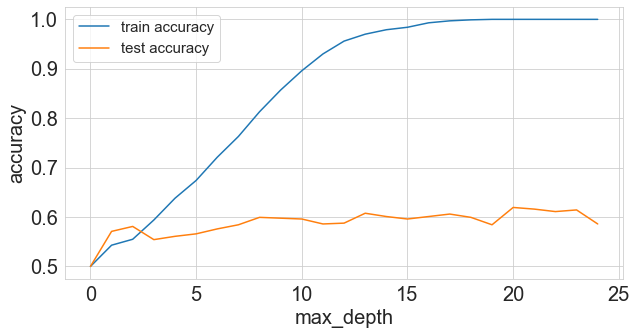

In [13]:
#create two plots using matplotlib and seaborn  
plt.figure(figsize=(10, 5))  
sns.set_style("whitegrid")  
plt.plot(train_accuracies, label="train accuracy")  
plt.plot(test_accuracies, label="test accuracy")  
plt.legend(loc="upper left", prop={'size': 15})  
plt.xticks(range(0, 26, 5))  
plt.xlabel("max_depth", size=20)  
plt.ylabel("accuracy", size=20)  
plt.show() 

simple decision tree model keeps learning about the training data better and better  with an increase in max_depth, but the performance on test data does not improve at all -- **This is called Overfitting**

Cross Validation Techniques:
- k-fold cross-validation  
- stratified k-fold cross-validation
- hold-out based validation
- leave-one-out cross-validation  
- group k-fold cross-validation 

We can split any data into k-equal parts using KFold

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn-model-selection-stratifiedkfold

Creates Random Index lists which can be used to filter out k-folds

----